# Universidad Politecnica de San Luis Potosí
## Mendoza Monreal Jose Israel - 173389
### Mineria de datos 25/04/2023
#### Algoritmo Kmeans
##### Clasificacion de Universidades SLP y SdGSanchez
---



Se cargan las librias pandas, numpy

In [43]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

Posteriormente se importan
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

La funcion read_csv permite leer un archivo csv en python

In [45]:
datos = ps.read_csv('/content/vars_escuelas_planeaams2017UTF.csv', delimiter=";")

Se muestran los datos en la variable 'datos'

In [46]:
datos

NombreEscuela TurnoEscuela  \
0    COLEGIO NACIONAL DE EDUCACION PROFESIONAL TECN...     MATUTINO   
1    COLEGIO NACIONAL DE EDUCACION PROFESIONAL TECN...   VESPERTINO   
2                       COLEGIO DE BACHILLERES NUM. 25     MATUTINO   
3                       COLEGIO DE BACHILLERES NUM. 25   VESPERTINO   
4                       COLEGIO DE BACHILLERES NUM. 26     MATUTINO   
..                                                 ...          ...   
129                               PROF. LIBRADO RIVERA   VESPERTINO   
130                E.P.C. NUM. 5 GRACIANO SANCHEZ ROMO     MATUTINO   
131                        E.P.C. NUM. 32 JUSTO SIERRA     MATUTINO   
132                                TOMAS MIRANDA LEURA     MATUTINO   
133                         FLORENCIO SALAZAR MARTINEZ   VESPERTINO   

                MunicipioEscuela  %AlumnosNivelLogroLyC_1  \
0                SAN LUIS POTOSI                     26.8   
1                SAN LUIS POTOSI                     52.8   
2                SAN LUIS POTOSI                     24.7   
3                SAN LUIS POTOSI                     22.9   
4                SAN LUIS POTOSI                      9.7   
..                           ...                      ...   
129  SOLEDAD DE GRACIANO SANCHEZ                     52.0   
130  SOLEDAD DE GRACIANO SANCHEZ                     27.5   
131  SOLEDAD DE GRACIANO SANCHEZ                     67.9   
132  SOLEDAD DE GRACIANO SANCHEZ                     54.7   
133  SOLEDAD DE GRACIANO SANCHEZ                     66.7   

     %AlumnosNivelLogroLyC_2  %AlumnosNivelLogroLyC_3  \
0                       31.0                     32.4   
1                       27.8                     19.4   
2                       31.5                     35.6   
3                       42.9                     31.4   
4                       26.4                     31.9   
..                       ...                      ...   
129                     26.7                     17.3   
130                     45.0                     22.5   
131                     17.9                     10.7   
132                     34.7                      9.3   
133                     23.8                      4.8   

     %AlumnosNivelLogroLyC_4  %AlumnosNivelLogroM_1  %AlumnosNivelLogroM_2  \
0                        9.9                   63.4                   21.1   
1                        0.0                   80.8                   19.2   
2                        8.2                   68.8                   23.4   
3                        2.9                   65.7                   27.1   
4                       31.9                   39.4                   29.6   
..                       ...                    ...                    ...   
129                      4.0                   82.4                   14.9   
130                      5.0                   76.9                   17.9   
131                      3.6                   96.4                    3.6   
132                      1.3                   86.7                    9.3   
133                      4.8                   95.2                    4.8   

     %AlumnosNivelLogroM_3  %AlumnosNivelLogroM_4  Grupo  
0                     12.7                    2.8    NaN  
1                      0.0                    0.0    NaN  
2                      7.8                    0.0    NaN  
3                      7.1                    0.0    NaN  
4                     22.5                    8.5    NaN  
..                     ...                    ...    ...  
129                    1.4                    1.4    NaN  
130                    5.1                    0.0    NaN  
131                    0.0                    0.0    NaN  
132                    4.0                    0.0    NaN  
133                    0.0                    0.0    NaN  

[134 rows x 12 columns]

Para quitar los datos con NaN realizamos la siguiente funcion

In [47]:
#datos = datos.dropna()

In [48]:
datos

NombreEscuela TurnoEscuela  \
0    COLEGIO NACIONAL DE EDUCACION PROFESIONAL TECN...     MATUTINO   
1    COLEGIO NACIONAL DE EDUCACION PROFESIONAL TECN...   VESPERTINO   
2                       COLEGIO DE BACHILLERES NUM. 25     MATUTINO   
3                       COLEGIO DE BACHILLERES NUM. 25   VESPERTINO   
4                       COLEGIO DE BACHILLERES NUM. 26     MATUTINO   
..                                                 ...          ...   
129                               PROF. LIBRADO RIVERA   VESPERTINO   
130                E.P.C. NUM. 5 GRACIANO SANCHEZ ROMO     MATUTINO   
131                        E.P.C. NUM. 32 JUSTO SIERRA     MATUTINO   
132                                TOMAS MIRANDA LEURA     MATUTINO   
133                         FLORENCIO SALAZAR MARTINEZ   VESPERTINO   

                MunicipioEscuela  %AlumnosNivelLogroLyC_1  \
0                SAN LUIS POTOSI                     26.8   
1                SAN LUIS POTOSI                     52.8   
2                SAN LUIS POTOSI                     24.7   
3                SAN LUIS POTOSI                     22.9   
4                SAN LUIS POTOSI                      9.7   
..                           ...                      ...   
129  SOLEDAD DE GRACIANO SANCHEZ                     52.0   
130  SOLEDAD DE GRACIANO SANCHEZ                     27.5   
131  SOLEDAD DE GRACIANO SANCHEZ                     67.9   
132  SOLEDAD DE GRACIANO SANCHEZ                     54.7   
133  SOLEDAD DE GRACIANO SANCHEZ                     66.7   

     %AlumnosNivelLogroLyC_2  %AlumnosNivelLogroLyC_3  \
0                       31.0                     32.4   
1                       27.8                     19.4   
2                       31.5                     35.6   
3                       42.9                     31.4   
4                       26.4                     31.9   
..                       ...                      ...   
129                     26.7                     17.3   
130                     45.0                     22.5   
131                     17.9                     10.7   
132                     34.7                      9.3   
133                     23.8                      4.8   

     %AlumnosNivelLogroLyC_4  %AlumnosNivelLogroM_1  %AlumnosNivelLogroM_2  \
0                        9.9                   63.4                   21.1   
1                        0.0                   80.8                   19.2   
2                        8.2                   68.8                   23.4   
3                        2.9                   65.7                   27.1   
4                       31.9                   39.4                   29.6   
..                       ...                    ...                    ...   
129                      4.0                   82.4                   14.9   
130                      5.0                   76.9                   17.9   
131                      3.6                   96.4                    3.6   
132                      1.3                   86.7                    9.3   
133                      4.8                   95.2                    4.8   

     %AlumnosNivelLogroM_3  %AlumnosNivelLogroM_4  Grupo  
0                     12.7                    2.8    NaN  
1                      0.0                    0.0    NaN  
2                      7.8                    0.0    NaN  
3                      7.1                    0.0    NaN  
4                     22.5                    8.5    NaN  
..                     ...                    ...    ...  
129                    1.4                    1.4    NaN  
130                    5.1                    0.0    NaN  
131                    0.0                    0.0    NaN  
132                    4.0                    0.0    NaN  
133                    0.0                    0.0    NaN  

[134 rows x 12 columns]

In [49]:
datos.head(1)

NombreEscuela TurnoEscuela  \
0  COLEGIO NACIONAL DE EDUCACION PROFESIONAL TECN...     MATUTINO   

  MunicipioEscuela  %AlumnosNivelLogroLyC_1  %AlumnosNivelLogroLyC_2  \
0  SAN LUIS POTOSI                     26.8                     31.0   

   %AlumnosNivelLogroLyC_3  %AlumnosNivelLogroLyC_4  %AlumnosNivelLogroM_1  \
0                     32.4                      9.9                   63.4   

   %AlumnosNivelLogroM_2  %AlumnosNivelLogroM_3  %AlumnosNivelLogroM_4  Grupo  
0                   21.1                   12.7                    2.8    NaN

In [50]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NombreEscuela            134 non-null    object 
 1   TurnoEscuela             134 non-null    object 
 2   MunicipioEscuela         134 non-null    object 
 3   %AlumnosNivelLogroLyC_1  134 non-null    float64
 4   %AlumnosNivelLogroLyC_2  134 non-null    float64
 5   %AlumnosNivelLogroLyC_3  134 non-null    float64
 6   %AlumnosNivelLogroLyC_4  134 non-null    float64
 7   %AlumnosNivelLogroM_1    134 non-null    float64
 8   %AlumnosNivelLogroM_2    134 non-null    float64
 9   %AlumnosNivelLogroM_3    134 non-null    float64
 10  %AlumnosNivelLogroM_4    134 non-null    float64
 11  Grupo                    0 non-null      float64
dtypes: float64(9), object(3)
memory usage: 12.7+ KB


In [51]:
print(datos.groupby('TurnoEscuela').size())

TurnoEscuela
MATUTINO      99
NOCTURNO       1
VESPERTINO    34
dtype: int64


In [52]:
datos2 = datos[['%AlumnosNivelLogroLyC_1',	'%AlumnosNivelLogroLyC_2',	'%AlumnosNivelLogroLyC_3',	'%AlumnosNivelLogroLyC_4',	'%AlumnosNivelLogroM_1',	'%AlumnosNivelLogroM_2',	'%AlumnosNivelLogroM_3',	'%AlumnosNivelLogroM_4']]
datos2

%AlumnosNivelLogroLyC_1  %AlumnosNivelLogroLyC_2  \
0                       26.8                     31.0   
1                       52.8                     27.8   
2                       24.7                     31.5   
3                       22.9                     42.9   
4                        9.7                     26.4   
..                       ...                      ...   
129                     52.0                     26.7   
130                     27.5                     45.0   
131                     67.9                     17.9   
132                     54.7                     34.7   
133                     66.7                     23.8   

     %AlumnosNivelLogroLyC_3  %AlumnosNivelLogroLyC_4  %AlumnosNivelLogroM_1  \
0                       32.4                      9.9                   63.4   
1                       19.4                      0.0                   80.8   
2                       35.6                      8.2                   68.8   
3                       31.4                      2.9                   65.7   
4                       31.9                     31.9                   39.4   
..                       ...                      ...                    ...   
129                     17.3                      4.0                   82.4   
130                     22.5                      5.0                   76.9   
131                     10.7                      3.6                   96.4   
132                      9.3                      1.3                   86.7   
133                      4.8                      4.8                   95.2   

     %AlumnosNivelLogroM_2  %AlumnosNivelLogroM_3  %AlumnosNivelLogroM_4  
0                     21.1                   12.7                    2.8  
1                     19.2                    0.0                    0.0  
2                     23.4                    7.8                    0.0  
3                     27.1                    7.1                    0.0  
4                     29.6                   22.5                    8.5  
..                     ...                    ...                    ...  
129                   14.9                    1.4                    1.4  
130                   17.9                    5.1                    0.0  
131                    3.6                    0.0                    0.0  
132                    9.3                    4.0                    0.0  
133                    4.8                    0.0                    0.0  

[134 rows x 8 columns]

In [53]:
X = datos[['%AlumnosNivelLogroLyC_1',	'%AlumnosNivelLogroLyC_2',	'%AlumnosNivelLogroLyC_3',	'%AlumnosNivelLogroLyC_4',
           '%AlumnosNivelLogroM_1',	'%AlumnosNivelLogroM_2',	'%AlumnosNivelLogroM_3',	'%AlumnosNivelLogroM_4']].values

In [54]:
X

array([[26.8, 31. , 32.4, ..., 21.1, 12.7,  2.8],
       [52.8, 27.8, 19.4, ..., 19.2,  0. ,  0. ],
       [24.7, 31.5, 35.6, ..., 23.4,  7.8,  0. ],
       ...,
       [67.9, 17.9, 10.7, ...,  3.6,  0. ,  0. ],
       [54.7, 34.7,  9.3, ...,  9.3,  4. ,  0. ],
       [66.7, 23.8,  4.8, ...,  4.8,  0. ,  0. ]])

Se debe estandarizar las variables con el algoritmo Kmeans por lo cual se usa la funcion, StandardScaler()

In [55]:
estandariza = StandardScaler()

In [56]:
Y = estandariza.fit_transform(X)
Y

array([[-0.11628829,  0.32543262,  0.07131436, ...,  0.02091396,
         0.46635105, -0.17567889],
       [ 1.10293655,  0.07322675, -0.74760198, ..., -0.11492008,
        -0.87993601, -0.42841939],
       [-0.21476415,  0.36483979,  0.27289376, ...,  0.18534463,
        -0.05308254, -0.42841939],
       ...,
       [ 1.81102482, -0.70703516, -1.29564598, ..., -1.23018899,
        -0.87993601, -0.42841939],
       [ 1.19203375,  0.61704566, -1.38383697, ..., -0.82268689,
        -0.45590859, -0.42841939],
       [ 1.75475291, -0.24203059, -1.66730801, ..., -1.14439908,
        -0.87993601, -0.42841939]])

Con esta funcion se estandarizan las variables

In [57]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
kmeans.fit(X)
clase = kmeans.predict(X)
clase


array([0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 3, 1, 1, 0, 2, 0, 2, 2,
       1, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 3, 1, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 3, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 3, 1, 0, 2, 1,
       2, 1, 3, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 2], dtype=int32)

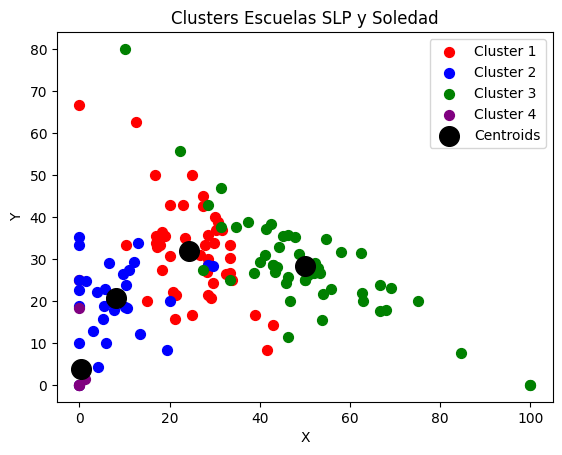

In [58]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'Black', label = 'Centroids')
plt.title('Clusters Escuelas SLP y Soledad')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Para exportarlo los datos de los clusters en formato csv se realiza lo siguente



In [59]:
score = silhouette_score(X, kmeans.labels_)
score

0.3058682569649536

El siguiente codigo exporta la clasificacion de los clusters calculados a un archivo csv

In [62]:
df = ps.DataFrame(clase, columns=['Cluster'])
df.to_csv('kmeans_predicciones.csv', index=False)
df

Cluster
0          0
1          2
2          0
3          0
4          1
..       ...
129        2
130        0
131        2
132        2
133        2

[134 rows x 1 columns]

La eficiencia del modelo arroja 30.58% de efectividad

#Conclusion
La clasificacion final de las universidades de SLP y Soledad esta ligeramente esparcida en 3 clusters pero un 4to cluster parece muy resagado